# heart disease project

### predicting heart disease using machine learning

we are going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Feature
5. Modelling 
6. Experimentation

## 1.Problem Definition
in a statement,
Given clinical parameters about a patient, can we predict whather or not they have heart disease?

## 2.Data

i use the open source database in kaggle website i put that link below:<br>
also this dataset is for UCL university:<br>
https://archive.ics.uci.edu/dataset/45/heart+disease<br>

# 3.Evaluation

when the model has 95% accuracy , it can be a absolute model to predict heart disease

# 4.Features

1. age Integer
2. sex	 	Categorical	
3. cp	 	Categorical
4. trestbps	 	Integer
5. chol	 	Integer		
6. fbs	 	Categorical	
7. restecg	 	Categorical
8. thalach	 	Integer		
9. exang	 	Categorical	
10. oldpeak	 	Integer		
11. slope	 	Categorical	
12. ca	 	Integer		
13. thal	 	Categorical	
14. num	Target	Integer	

### Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,RocCurveDisplay

### Loading Data and visualize them for figure out about

In [3]:
heart_disease = pd.read_csv('heart-disease.csv')

In [4]:
heart_disease.shape

(303, 14)

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_disease.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
35   1    0   120       198   0    1        130      1      1.6      1      0   3     0         1
              126       282   0    0        156      1      0.0      2      0   3     0         1
          1   122       192   0    1        174      0      0.0      2      0   2     1         1
37   0    2   120       215   0    1        170      0      0.0      2      0   2     1         1
                                                                                               ..
41   1    1   135       203   0    1        132      0      0.0      1      0   1     1         1
          2   112       250   0    1        179      0      0.0      2      0   2     1         1
              130       214   0    0        168      0      2.0      1      0   2     1         1
42   0    0   102       2

In [7]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

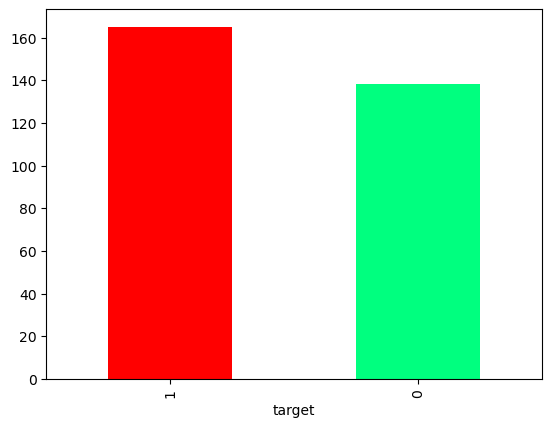

In [8]:
heart_disease['target'].value_counts().plot(kind='bar',color = ['red','springgreen'])

In [9]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


visualize how many disease in each sex:

In [11]:
sex_target = pd.crosstab(heart_disease['sex'],heart_disease['target'])
sex_target

target,0,1
sex,,
0,24,72
1,114,93


Text(0, 0.5, 'Amount')

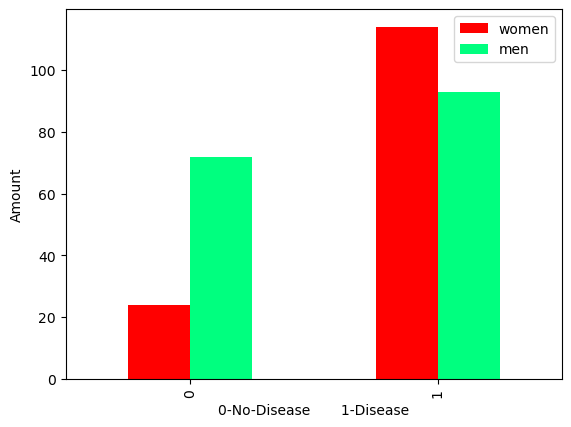

In [12]:
sex_target.plot(kind='bar',color=['red','springgreen'])
plt.legend(['women','men'])
plt.xlabel('0-No-Disease       1-Disease')
plt.ylabel('Amount')

### chack and find some patterns in our dataset 

age vs. thalach in disease persons and not disease persons

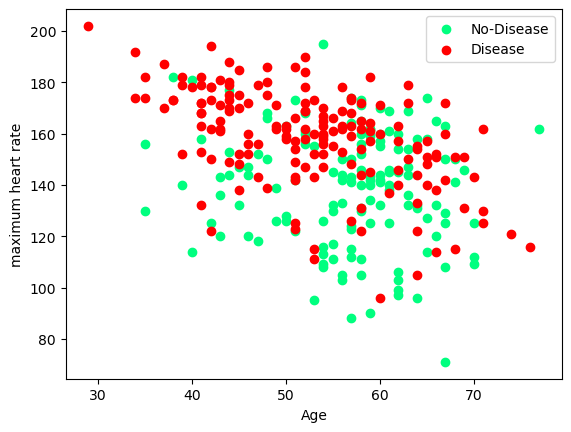

In [13]:
plt.scatter(heart_disease.age[heart_disease['target'] == 0],heart_disease.thalach[heart_disease['target'] == 0],
            c= 'springgreen')
plt.scatter(heart_disease.age[heart_disease['target'] == 1],heart_disease.thalach[heart_disease['target'] == 1],
            c= 'red')
plt.xlabel('Age')
plt.ylabel('maximum heart rate')
plt.legend(['No-Disease','Disease'])

### Find Outliers with distribution in age section

<Axes: ylabel='Frequency'>

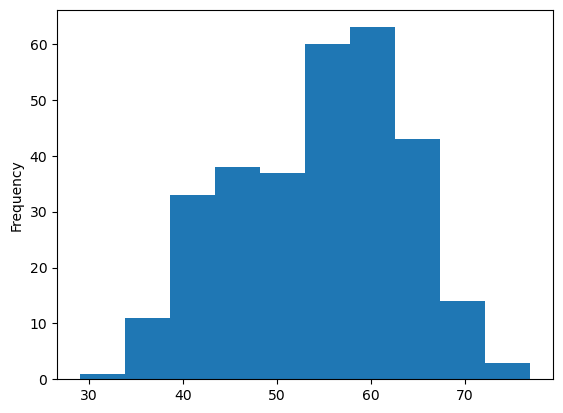

In [14]:
heart_disease['age'].plot.hist()

### cp is a categorical data and just has 4 category:<br>
### need find relative between cp categories and disease 
1. Typical angina
2. Atypical angina
3. Non-anginal pain
4. Asymptomatic

Text(0.5, 0, 'CP categories')

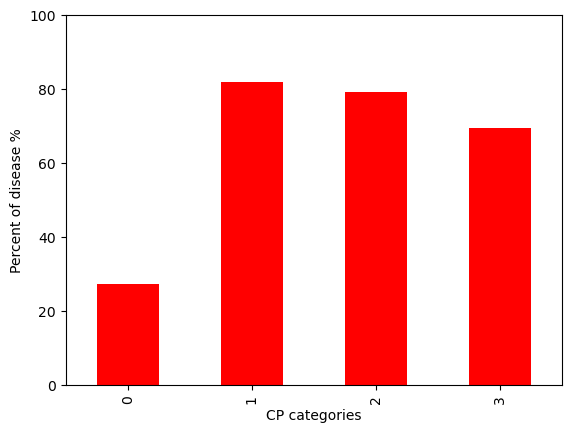

In [15]:
cp_target = pd.crosstab(heart_disease['cp'],heart_disease['target'])
cp_cat_array = sorted(heart_disease['cp'].unique().tolist())

percentages = []

for cp_value in sorted(heart_disease['cp'].unique()):
    cp_group = heart_disease[heart_disease['cp'] == cp_value]
    count_target1 = cp_group[cp_group['target'] == 1].shape[0]
    total_count = cp_group.shape[0]
    percentage = (count_target1 / total_count) * 100
    percentages.append(percentage)

cp_percent = pd.DataFrame({
    'cp':cp_cat_array,
    'percentage':percentages
})

cp_percent['percentage'].plot(kind='bar',color = ['red'])
plt.ylim([0,100])
plt.ylabel("Percent of disease %")
plt.xlabel("CP categories")


### Correlation between 2 features

In [16]:
corr_matrix = heart_disease.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


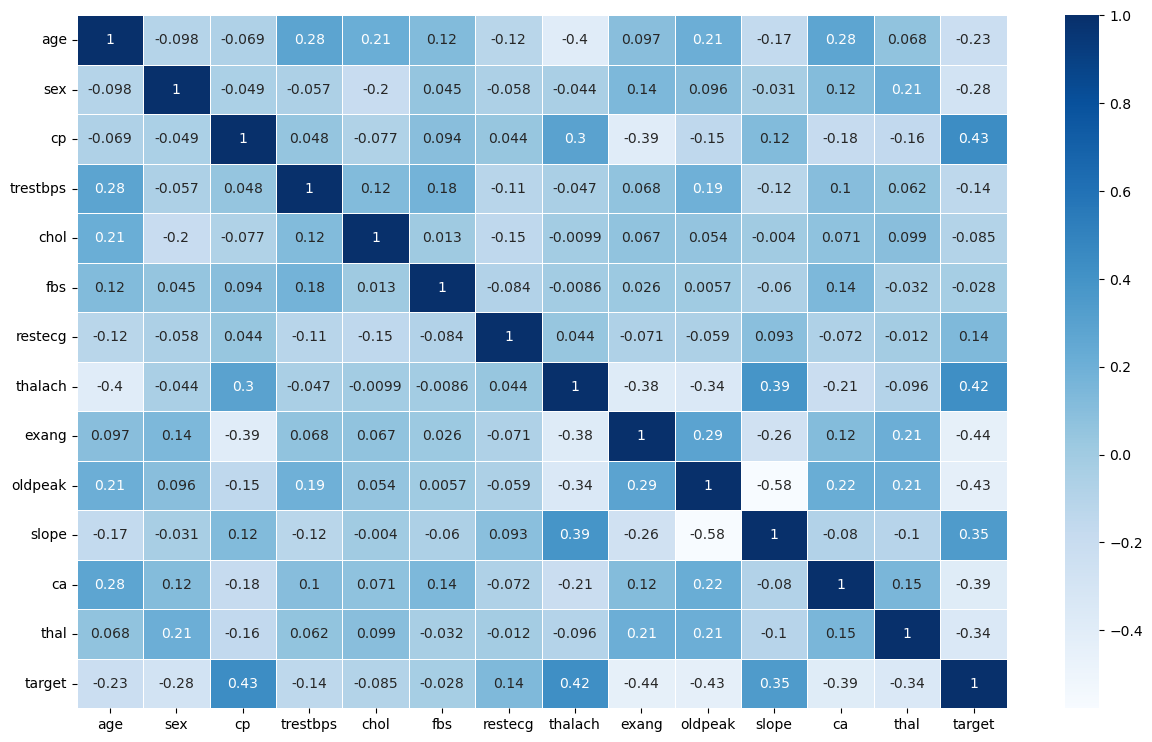

In [17]:
ax , fig = plt.subplots(figsize=(15,9))
ax = sns.heatmap(data=corr_matrix,annot=True,linewidths=0.5,cmap='Blues')

In [18]:
np.random.seed(43)
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25)

### use 3 powerfull classification model to see which model predicting better
1. Logistic Regression
2. KNN
3. RandomForestClassification


In [19]:
np.random.seed(43)
models_dict = {
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'KNN':KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}
def fit_models(models_dict,x_train,y_train,x_test,y_test):
    modelscore = {}
    for name, model in models_dict.items():
        model.fit(x_train, y_train)
        modelscore[name] =  model.score(x_test, y_test)
    return modelscore

In [20]:
baseline_accuracy = fit_models(models_dict,x_train,y_train,x_test,y_test)

compare this 3 classification model with matplotlib visualization

In [21]:
#panda allways take a dictionary in column form but we usually want row form so we need a transpose that
baseline_accuracy = pd.DataFrame(baseline_accuracy,index = ['accuracy']).transpose()
baseline_accuracy

,accuracy
LogisticRegression,0.894737
KNN,0.644737
RandomForestClassifier,0.828947


<Axes: >

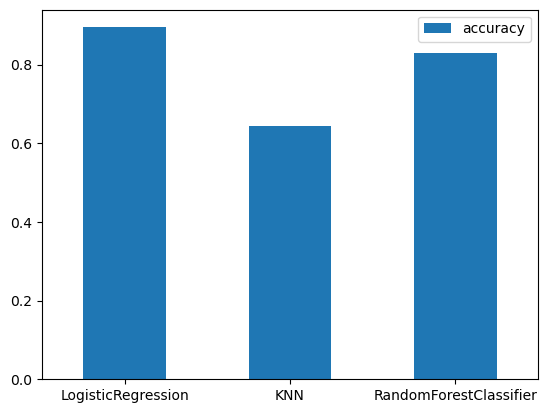

In [22]:
#rot = 0 is important
baseline_accuracy.plot.bar(rot = 0)

now we go to KNN implement to see do we want to improve hyperparameter to take better result

the most important hyperparameter in KNN is n_neighbers. we should <br>
try that from 1 to 21 forexample to find better k or n_neighbers 
<br>
for our KNN model.

In [23]:
def KNN_implement(x_train,y_train,x_test,y_test):
    train_scores = []
    test_scores = []
    for k in range(1,21):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train,y_train)
        train_scores.append(model.score(x_train,y_train))
        test_scores.append(model.score(x_test,y_test))
    return train_scores,test_scores

In [24]:
train_scores,test_scores= KNN_implement(x_train,y_train,x_test,y_test)

Text(0.5, 0, 'Number of Neighbors')

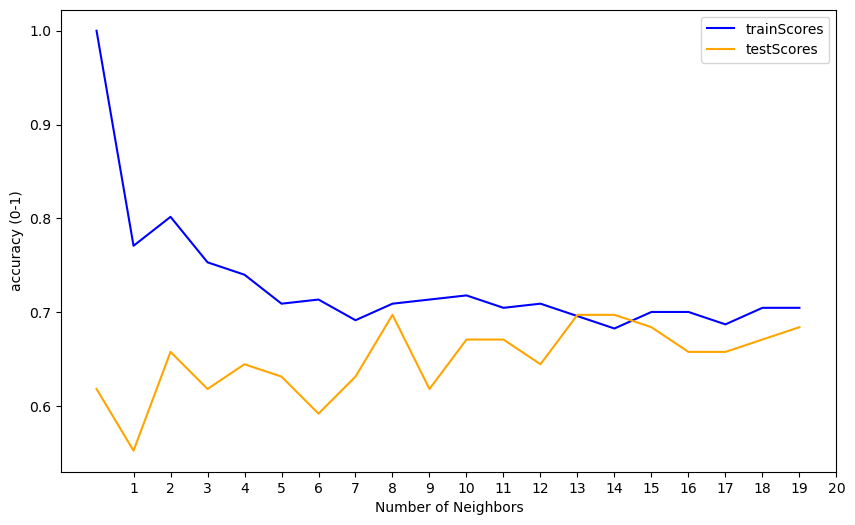

In [25]:
fig , ax = plt.subplots(figsize = (10,6))
ax.plot(train_scores,color='blue')
ax.plot(test_scores,color = 'orange')
ax.legend(['trainScores','testScores'])
ax.set_xticks(range(1,21))
ax.set_ylabel('accuracy (0-1)')
ax.set_xlabel('Number of Neighbors')

in k = 8 we have best choice for this model but now we see this accuracy almost 0.7 percent so Logistic Regression and RandomForestRegression
are better then KNN model.

diving to RandomForestRegression and LogisticRegression

In [26]:
#Logistic Regression
model = LogisticRegression()
param_dist = {
    'C': np.logspace(-4,4,20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}
modelRS_logistic = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    random_state=42,
    verbose=2
)

In [27]:
model = RandomForestClassifier()
param_dist = {
    'n_estimators': np.arange(10, 1000, 50),  
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

modelRS_forest = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,            
    cv=5,
    random_state=42,
)


In [28]:
modelRS_logistic.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.08858667904100823, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, class_weight=None, penalty=l1, solver=liblinear; to

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [29]:
modelRS_logistic.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'class_weight': None,
 'C': np.float64(0.23357214690901212)}

In [30]:
baseline_accuracy

,accuracy
LogisticRegression,0.894737
KNN,0.644737
RandomForestClassifier,0.828947


change hyperparameter logistic regression but dont see any improving in our model.

In [31]:
#modelRS_forest.fit(x_train,y_train)

In [32]:
# modelRS_forest.score(x_test,y_test)

now see the logistic regression is the best choice for training our model so we diving deeper on logistic regression
so use GridSearchCV:

In [33]:
model = LogisticRegression()
# param_grid = {
#     'C': np.logspace(-4, 4, 50),
#     'penalty': ['l1', 'l2','elasticnet'],
#     'solver': ['liblinear'],
#     'class_weight': [None, 'balanced']
# }
param_grid = [
    {
        'C': np.logspace(-4, 4, 50),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'],
        'class_weight': [None, 'balanced']
    },
    {
        'C': np.logspace(-4, 4, 50),
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'class_weight': [None, 'balanced'],
        'l1_ratio': [0.1, 0.5, 0.9]
    }
]

modelGS_logistic = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [34]:
modelGS_logistic.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


,estimator,LogisticRegression()
,param_grid,"[{'C': array([1.0000...00000000e+04]), 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}, {'C': array([1.0000...00000000e+04]), 'class_weight': [None, 'balanced'], 'l1_ratio': [0.1, 0.5, ...], 'penalty': ['elasticnet'], ...}]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [35]:
modelGS_logistic.score(x_test,y_test)

0.881578947368421

In [36]:
modelGS_logistic.best_params_

{'C': np.float64(0.18420699693267145),
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

### Evaluating our tuned machine learning beyond accuracy. <br>
1. Confusion Matrix 
2. ROC curve and AUC score 
3. Classification report 
4. Precision 
5. Recall 
6. F1 score

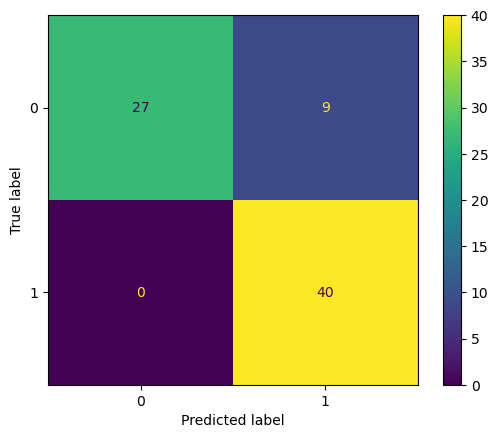

In [37]:
y_pred = modelGS_logistic.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

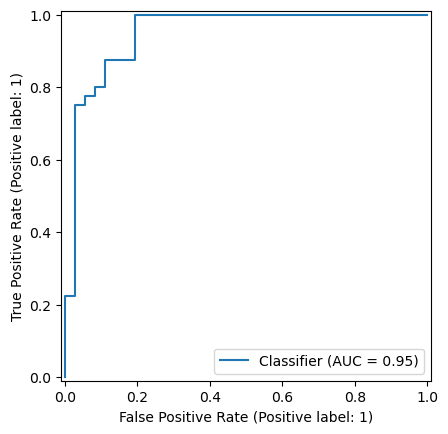

In [38]:
y_prob = modelGS_logistic.predict_proba(x_test)[:,1]
RocCurveDisplay.from_predictions(y_test,y_prob)

In [39]:
class_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True)).transpose()
class_report

,precision,recall,f1-score,support
0,1.000000,0.750000,0.857143,36.000000
1,0.816327,1.000000,0.898876,40.000000
accuracy,0.881579,0.881579,0.881579,0.881579
macro avg,0.908163,0.875000,0.878010,76.000000
weighted avg,0.903330,0.881579,0.879108,76.000000


In [40]:
# it equals to support
y_test.shape

(76,)

also we calculate scores with cross validation method to more intuition

cross_val_score:
1. accuracy 
2. precision
3. recall
4. f1

In [41]:
modelGS_logistic.best_params_

{'C': np.float64(0.18420699693267145),
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [42]:
modelGS_logistic =  LogisticRegression(C=0.18420699693267145,class_weight=None,penalty='l2',solver='liblinear')

In [43]:
cv_acc = cross_val_score(
    modelGS_logistic,X=x , y = y , scoring='accuracy',cv=5
)
cv_acc = cv_acc.mean()
cv_acc

np.float64(0.8446994535519124)

In [44]:
cv_precision = cross_val_score(
    modelGS_logistic,X=x , y = y , scoring='precision',cv=5
)
cv_precision = cv_precision.mean()
cv_precision

np.float64(0.8207936507936507)

In [45]:
cv_recall = cross_val_score(
    modelGS_logistic,X=x , y = y , scoring='recall',cv=5
)
cv_recall = cv_recall.mean()
cv_recall

np.float64(0.9212121212121213)

In [46]:
cv_f1 = cross_val_score(
    modelGS_logistic,X=x , y = y , scoring='f1',cv=5
)
cv_f1 = cv_f1.mean()
cv_f1

np.float64(0.8673007976269721)

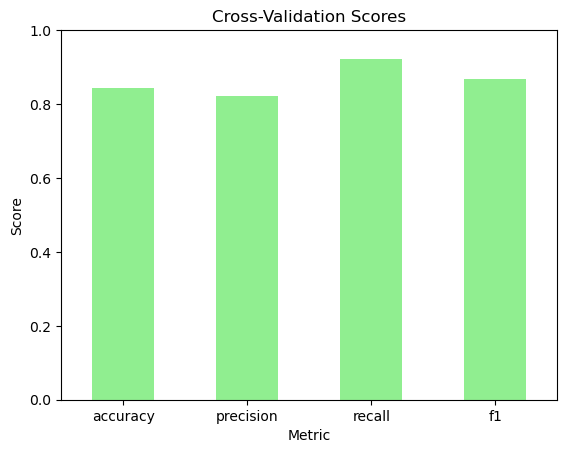

In [47]:
cross_val_scores = pd.DataFrame({
    'Metric': ['accuracy', 'precision', 'recall', 'f1'],
    'Score': [cv_acc, cv_precision, cv_recall, cv_f1]
})
cross_val_scores.plot.bar(x = 'Metric',y = 'Score',legend = False,color='lightgreen')
plt.ylim([0, 1.0])
plt.ylabel('Score')
plt.title('Cross-Validation Scores')
plt.xticks(rotation=0)
plt.show()

now we check correlation between each feature with their target

In [48]:
modelGS_logistic.fit(x_train,y_train)
modelGS_logistic.coef_

array([[ 3.96163153e-03, -5.70649780e-01,  7.05167864e-01,
        -1.40441889e-02, -1.58364419e-04, -2.17881571e-02,
         1.49090844e-01,  2.08776337e-02, -5.18216609e-01,
        -4.61536714e-01,  4.70685310e-01, -4.83782911e-01,
        -5.44314728e-01]])

In [61]:
coef_dict = dict(zip(heart_disease.columns,list(modelGS_logistic.coef_[0])))
coef_dataframe = pd.DataFrame(coef_dict, index = ['amount']).transpose()

(-1.0, 1.0)

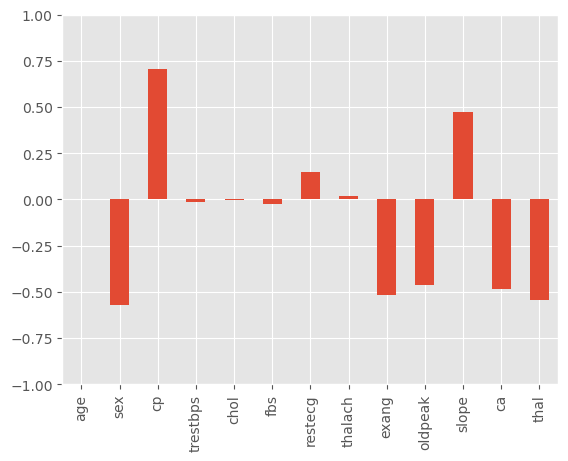

In [62]:
plt.style.use('ggplot')
coef_dataframe.plot.bar(legend = False)
plt.ylim([-1.0,1.0])

if we like this model and it could hit our accuracy we can export this model and save it to use in future.